In [1]:
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Users/USER/Desktop/corona_update.csv')

In [3]:
df.head()

,Date,New_cases,Death
0,16-Mar,3,0
1,17-Mar,0,0
2,18-Mar,4,1
3,19-Mar,4,0
4,20-Mar,2,0


In [4]:
df.describe(include='all')

,Date,New_cases,Death
count,39,39.000000,39.000000
unique,39,NaN,NaN
top,13-Apr,NaN,NaN
freq,1,NaN,NaN
mean,NaN,107.153846,3.256410
std,NaN,150.387314,3.898164
min,NaN,0.000000,0.000000
25%,NaN,3.000000,0.000000
50%,NaN,9.000000,1.000000
75%,NaN,195.500000,5.500000


In [5]:
print(df.dtypes)

Date         object
New_cases     int64
Death         int64
dtype: object


In [6]:
import seaborn as sns
import scipy as stats

In [7]:
df.corr()

,New_cases,Death
New_cases,1.000000,0.877117
Death,0.877117,1.000000


In [8]:
df.head()

,Date,New_cases,Death
0,16-Mar,3,0
1,17-Mar,0,0
2,18-Mar,4,1
3,19-Mar,4,0
4,20-Mar,2,0


In [13]:
#days= [x for x in range(1,41)]

In [14]:
#days

In [15]:
df= df.assign(Days=[x for x in range(1,40)])

In [16]:
df.head()

,Date,New_cases,Death,Days
0,16-Mar,3,0,1
1,17-Mar,0,0,2
2,18-Mar,4,1,3
3,19-Mar,4,0,4
4,20-Mar,2,0,5


(0, 15.968772724305362)

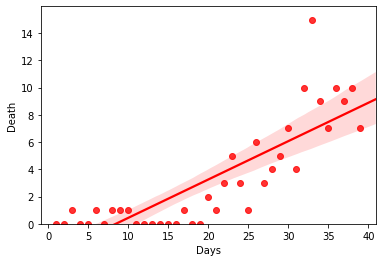

In [17]:
sns.regplot(x='Days',y='Death',data=df,color='r') #co-relation of death with days
plt.ylim(0,)

(0, 16.5516859948187)

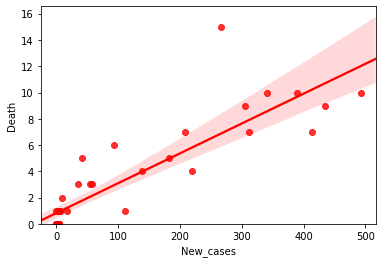

In [18]:
sns.regplot(x='New_cases',y='Death',data=df,color='r') #co-relation of death with new cases
plt.ylim(0,)

In [19]:
df[['Days', 'Death']].corr()

,Days,Death
Days,1.000000,0.824183
Death,0.824183,1.000000


In [20]:
df[['New_cases', 'Death']].corr()

,New_cases,Death
New_cases,1.000000,0.877117
Death,0.877117,1.000000


In [21]:
from scipy import stats
pearson_coef,p_value = stats.pearsonr(df['Days'],df['Death']) #Pearson co-efficient and P Value of death vs Days
print(pearson_coef,"\n", p_value)

0.824183415465123 
 1.1406178705761992e-10


In [22]:
from scipy import stats
pearson_coef,p_value = stats.pearsonr(df['New_cases'],df['Death']) #Pearson co-efficient and P Value of death vs New cases
print(pearson_coef,"\n", p_value)

0.8771173498263031 
 2.4195465481433955e-13


In [23]:
#Here Pearson Co-efficient is approximately 0.82 wich suggest there is a strong co-relationship between death and days.
#Here Pearson Co-efficient is approximately 0.87 wich suggest there is a strong co-relationship between death and days.
#p-value is less than 0.001 , means relationship between days and death is significant
#p-value is less than 0.001 , means relationship between days and new cases is significant

In [24]:
df.describe()

,New_cases,Death,Days
count,39.000000,39.000000,39.000000
mean,107.153846,3.256410,20.000000
std,150.387314,3.898164,11.401754
min,0.000000,0.000000,1.000000
25%,3.000000,0.000000,10.500000
50%,9.000000,1.000000,20.000000
75%,195.500000,5.500000,29.500000
max,492.000000,15.000000,39.000000


In [25]:
df.describe(include=['object'])

,Date
count,39
unique,39
top,13-Apr
freq,1


In [26]:
#Single Linear regression and multiple linear regession

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
X= df[['Days']]
Y= df['Death']

In [30]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
Yhat = lm.predict(X)
Yhat[0:5]

array([-2.0974359 , -1.81565452, -1.53387314, -1.25209177, -0.97031039])

In [32]:
lm.intercept_

-2.3792172739541178

In [33]:
lm.coef_

array([0.28178138])

(0, 15.958877445071305)

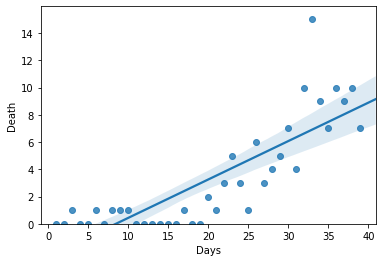

In [34]:
#regression plot

sns.regplot(x='Days',y='Death',data=df)
plt.ylim(0,)

In [35]:
#multiple regression
z=df[['Days','New_cases']]

In [36]:
lm.fit(z,df['Death'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
lm.intercept_

-0.4580426572646519

In [38]:
lm.coef_

array([0.09753414, 0.01646017])

(0, 16.319495090452868)

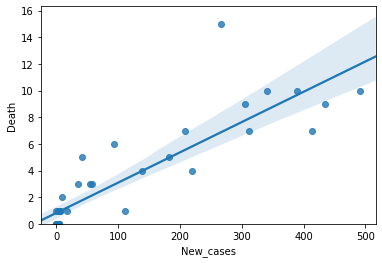

In [40]:
#regression plot

sns.regplot(x='New_cases',y='Death',data=df)
plt.ylim(0,)

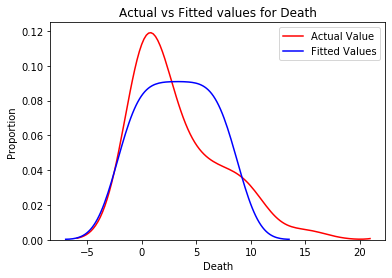

In [41]:
#multiple linear regression
y_hat= lm.predict(z)
ax1= sns.distplot(df['Death'],hist=False,color='r',label='Actual Value')
sns.distplot(Yhat,color='b',hist=False,label='Fitted Values',ax=ax1)

plt.title('Actual vs Fitted values for Death')
plt.xlabel('Death')
plt.ylabel('Proportion')
plt.show()
plt.close()

In [78]:
#polynomial regression

def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(0,150,1000)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new,'-')
    plt.title('Polynomial Fit with Matplotlib')
    ax = plt.gca()
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Death')
    plt.show()
    plt.close()

In [80]:
x=df['Days']
y = df['Death']
f = np.polyfit(x,y,2)
p = np.poly1d(f)
print(p)

         2
0.01072 x - 0.1468 x + 0.5496


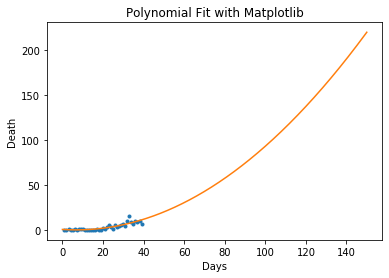

In [81]:
PlotPolly(p,x,y,'Days')

In [75]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(0,150,1000)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new,'-')
    plt.title('Polynomial Fit with Matplotlib')
    ax = plt.gca()
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('New Cases')
    plt.show()
    plt.close()

In [76]:
x=df['Days']
y = df['New_cases']
f = np.polyfit(x,y,2)
p = np.poly1d(f)
print(p)

        2
0.6223 x - 13.7 x + 53.37


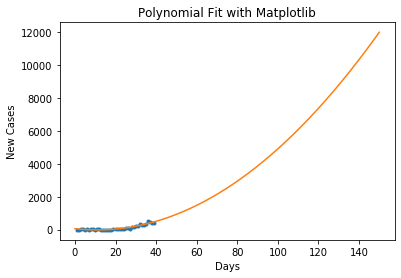

In [77]:
PlotPolly(p,x,y,'Days')

In [51]:
#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [54]:
pipe = Pipeline(input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [55]:
pipe.fit(z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [56]:
ypipe = pipe.predict(z)
ypipe[0:4]

array([ 3.00000000e+00, -1.42108547e-14,  4.00000000e+00,  4.00000000e+00])

In [57]:
lm.fit(X,Y)  #In_sample_evaluation #RSquare #MSE #simple_linear_regression
print('The R-Square is: ', lm.score(X,Y))

The R-Square is:  0.6792783023277554


In [58]:
Yhat = lm.predict(X)
print('The output of the predicted value is : ', Yhat[0:4])

The output of the predicted value is :  [-2.0974359  -1.81565452 -1.53387314 -1.25209177]


In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
#multiple linear regression
#calculate_r_square

lm.fit(z,df['Death'])
print('The R Square is: ', lm.score(z,df['Death']))

The R Square is:  0.792105770773139


In [61]:
y_predict_multifit = lm.predict(z)

In [62]:
print('The MSE of price and predicted value using multifit is: ', mean_squared_error(df['Death'],y_predict_multifit))

The MSE of price and predicted value using multifit is:  3.0780920724450422


In [63]:
#polynomial fit

In [64]:
from sklearn.metrics import r2_score

In [65]:
r_squared = r2_score(y,p(x))
print('The R-square value is: ', r_squared) 

The R-square value is:  0.9453107291613028


In [66]:
mean_squared_error(df['Death'],p(x))

30670.883671426986

In [67]:
#Prediction and Decision making

In [68]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [69]:
new_input = np.arange(1,100,1 ).reshape(-1,1)

In [70]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
#produce a prediction

In [72]:
yhat= lm.predict(new_input)
yhat[0:5]

array([-2.0974359 , -1.81565452, -1.53387314, -1.25209177, -0.97031039])

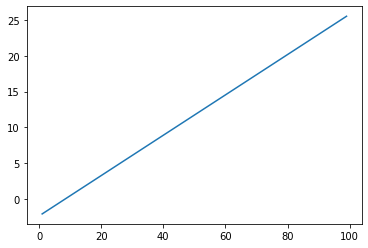

In [73]:
plt.plot(new_input, yhat)

In [74]:
#Decision:
#Multiple linear regression is moderate to use because the MSE value of Ploynomial regression is very high. 
#MSE of MLR is much smaller and R^2 is average than other regreesions. 
#MSE of PR is very high but R^2 value of PR is pretty good.